In [35]:
%matplotlib inline
#%matplotlib notebook
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import utils # local lib
from nolitsa import data, delay, d2, dimension
from nolitsa import utils as n_utils
import nolds


['Axes3D', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acf', 'acorr_ljungbox', 'add_stochastic_trend', 'arcoef2autocorr', 'embed_data', 'generate_arma_ts', 'nolitsa', 'np', 'pacf', 'plot_3d_attractor', 'plot_acf', 'plot_pacf', 'plt', 'polynomial_fit', 'read_datfile', 'rolling_window']


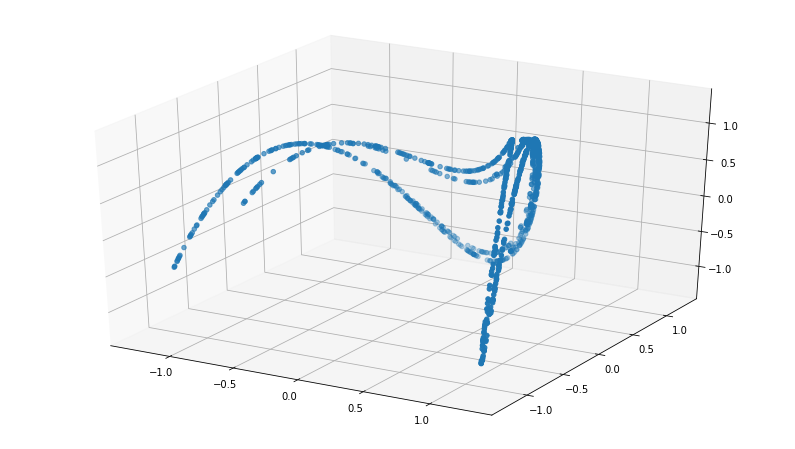

In [34]:
embedded = embed_data(xM, order=3, delay=1)
embedded
plot_3d_attractor(embedded)


In [ ]:
print(dir(data))


In [3]:
xM = data.henon();
xM, xM.shape


(array([[-0.92682214, -1.28411472],
        [-0.5878334 , -0.92682214],
        [ 0.23818601, -0.5878334 ],
        ...,
        [-1.04486567,  1.18271181],
        [-0.17362843, -1.04486567],
        [ 0.64433474, -0.17362843]]), (10000, 2))

## Check for stationarity (Visual Inspection + statistical test)

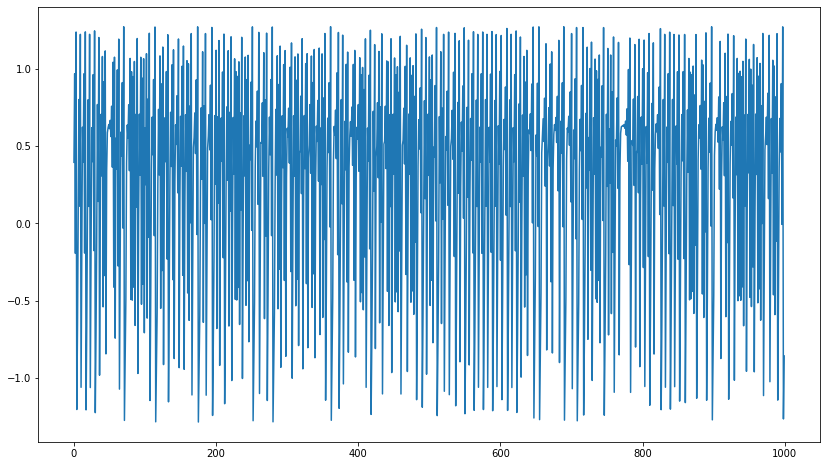

In [4]:
xM = xM[2000:3000, 0]
plt.figure(figsize=(14, 8))
plt.plot(xM)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(xM, maxlag=None)
print(adf)

## Compute autocorrelation and delayed mutual information.


In [ ]:
print(dir(delay))
help(delay.acorr)

In [ ]:
maxtau = 10
lag = np.arange(maxtau)
r = delay.acorr(xM, maxtau=maxtau)
i = delay.dmi(xM, maxtau=maxtau)
r_delay = np.argmax(r < 1.0 / np.e)
print(r)
print(r'Autocorrelation time = %d' % r_delay)

In [ ]:
plt.figure(1, figsize=(14, 8))

plt.subplot(211)
plt.title(r'Delay estimation for Henon map')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, marker='o')

plt.subplot(212)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.axhline(1.0 / np.e, linestyle='--', alpha=0.7, color='red' )


plt.figure(2, figsize=(14, 8))
plt.subplot(111)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(xM[:-r_delay], xM[r_delay:], '.')

plt.show()

In [ ]:
dim = np.arange(1, 10 + 1)
f1, f2, f3 = dimension.fnn(xM, tau=1, dim=dim, window=10, metric='cityblock')

In [ ]:
plt.title(r'FNN for Henon map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.legend()

plt.show()

## Correlation Sum

In [ ]:
plt.figure(figsize=(14, 8))
plt.title('Local $D_2$ vs $r$ for Henon map')
plt.xlabel(r'Distance $r$')
plt.ylabel(r'Local $D_2$')
theiler_window = 10
tau = 1
dim = np.arange(1, 10 + 1)

for r, c in d2.c2_embed(xM, tau=tau, dim=dim, window=theiler_window,
                        r=n_utils.gprange(0.001, 1.0, 100)):
    plt.semilogx(r[3:-3], d2.d2(r, c), color='#4682B4')

plt.semilogx(n_utils.gprange(0.001, 1.0, 100), 1.220 * np.ones(100),
             color='#000000')
plt.show()

In [21]:
r = n_utils.gprange(0.001, 1.0, 100)
corr_dim, debug_data = nolds.corr_dim(xM, emb_dim=2, rvals=r, debug_data=True)

In [29]:
rvals = debug_data[0] #values used for log(r)
csums = debug_data[1] #the corresponding log(C(r))
poly = debug_data[2] #line coefficients ([slope, intercept])


array([ 0.91304634, -1.33346364])

Text(0, 0.5, 'log(C(r))')

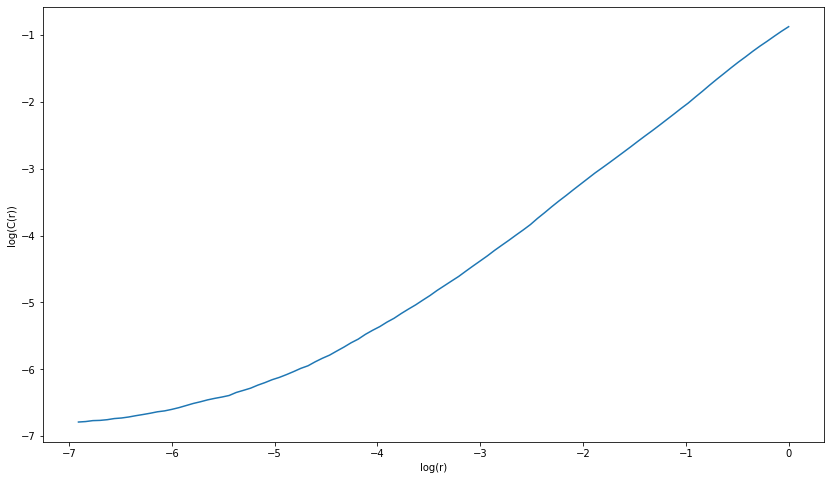

In [28]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(rvals, csums)
ax.set_xlabel('log(r)')
ax.set_ylabel('log(C(r))')

## Predictions
- LAP
- LLP

## Real Data

In [ ]:
with open('epileeg.dat', 'r') as file:
    lines = file.readlines()
xM = np.full(shape=len(lines), fill_value=np.nan)
for i, line in enumerate(lines):
    point = line.rstrip().lstrip()
    xM[i] = point
xM = np.array(xM)
xM
plt.plot(xM)
plt.show()